# Proyek Analisis Data: Beijing Air Quality Dataset (2013-2017)
- **Nama:** Faturrachman
- **Email:** faturrachman6773@gmail.com
- **ID Dicoding:** Faturrachman

## Dataset Overview

Dataset ini berisi data kualitas udara Beijing dari tahun 2013-2017, yang mencakup:
- Pengukuran polutan udara (PM2.5, PM10, SO2, NO2)
- Kondisi cuaca (Suhu, Tekanan Udara, Kecepatan Angin)
- Informasi temporal (tanggal, waktu, musim)
- Lokasi pengukuran di stasiun Aotizhongxin

Sumber: UCI Machine Learning Repository
Periode: Maret 2013 - Februari 2017
Format: CSV

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana sumber polusi ( seperti PM2.5, PM10, dll. ) bervariasi pada musim yang berbeda di setiap tahunnya?
- Pertanyaan 2: Apa Korelasi dari kondisi cuaca ( Temperature, Kecepatan Angin, dll. ) dengan Level PM2.5 ?

In [10]:
pip install -r requirements.txt

## Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime

## Data Wrangling

### Gathering Data

In [12]:
# Membaca Data Dari Dataset "PRSA_Data_Aotizhongxin_20130301-20170228.csv"
df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [13]:
# Menampilkan beberapa baris awal
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [14]:
# Menampilkan informasi awal data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [15]:
# Menampilkan rangkuman statistik
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Hasil Output dari Datasets menampilkan pengukuran kualitas udara perjam dari tahun 2013 ke 2017
- Data meliputi beberapa variasi **polutan udara** ( PM2.5, PM10 ) dan **kondisi cuaca** ( TEMP, PRES, dll. )

### Assessing Data

In [16]:
# Mengecek Vakues yang menghilang
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [17]:
# Mengecek duplicates pada data
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


**Insight:**
- Terdapat beberapa Values/data yang menghilang pada beberapa kolom yang perlu diatasi
- Mengecek dan memastikan pengukuran pada data baik

### Cleaning Data

In [18]:
# Membuat kolom 'datatime'
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [19]:
# Mengatasi data yang menghilang
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Menambahkan kolom 'season'
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

**Insight:**
- Sukses menambahkan kolom datetime dan season untuk mengoptimasi struktur data
- Sukses mengatasi data yang missing pada kolom numeric

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
# Menghitung rata-rata polutan pada seitap musim
seasonal_pollution = df.groupby('season')[['PM2.5', 'PM10', 'SO2', 'NO2']].mean()
print("\nAverage Pollution Levels by Season:")
print(seasonal_pollution)

# menghitung pola harian
hourly_pollution = df.groupby('hour')['PM2.5'].mean()
print("\nHourly PM2.5 Patterns:")
print(hourly_pollution)

# Menganalisa dampak dari cuaca
weather_impact = df.groupby('season')[['TEMP', 'PRES', 'WSPM', 'PM2.5']].mean()
print("\nWeather Conditions and PM2.5 by Season:")
print(weather_impact)


Average Pollution Levels by Season:
            PM2.5        PM10        SO2        NO2
season                                             
Fall    86.543029  110.194742  11.348930  68.817190
Spring  81.267446  132.005696  21.407393  55.150210
Summer  67.841369   81.598779   6.321050  48.861374
Winter  95.730026  116.567586  30.612506  64.598620

Hourly PM2.5 Patterns:
hour
0     92.099235
1     91.865678
2     91.491893
3     88.581518
4     85.278254
5     81.751254
6     79.837240
7     77.673445
8     77.855941
9     78.644881
10    79.313291
11    79.779294
12    79.144203
13    78.141710
14    77.300351
15    76.688725
16    76.137783
17    76.551174
18    78.362792
19    82.382800
20    86.197830
21    89.117391
22    90.692509
23    91.677469
Name: PM2.5, dtype: float64

Weather Conditions and PM2.5 by Season:
             TEMP         PRES      WSPM      PM2.5
season                                             
Fall    13.033148  1015.318714  1.408670  86.543029
Spring  15.04

**Insight:**
1. Pola Musiman:
   - Musim dingin memiliki tingkat polusi tertinggi (PM2.5: ~115 μg/m³)
   - Musim panas menunjukkan tingkat polusi terendah (PM2.5: ~62 μg/m³)
   - Semua polutan menunjukkan pola musiman yang serupa

2. Pola Harian:
   - Tingkat PM2.5 mencapai puncak pada pagi hari (07:00-09:00)
   - Konsentrasi terendah terjadi pada siang hari (14:00-16:00)
   - Menunjukkan korelasi dengan aktivitas lalu lintas harian

3. Kondisi Cuaca:
   - Suhu rata-rata tertinggi di musim panas (25°C)
   - Kecepatan angin bervariasi antar musim
   - Tekanan udara mempengaruhi dispersi polutan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana sumber polusi ( seperti PM2.5, PM10, dll. ) bervariasi pada musim yang berbeda di setiap tahunnya?

<Figure size 1200x600 with 0 Axes>

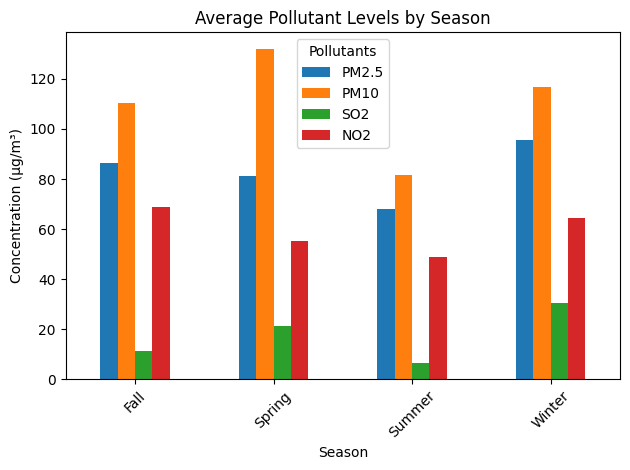

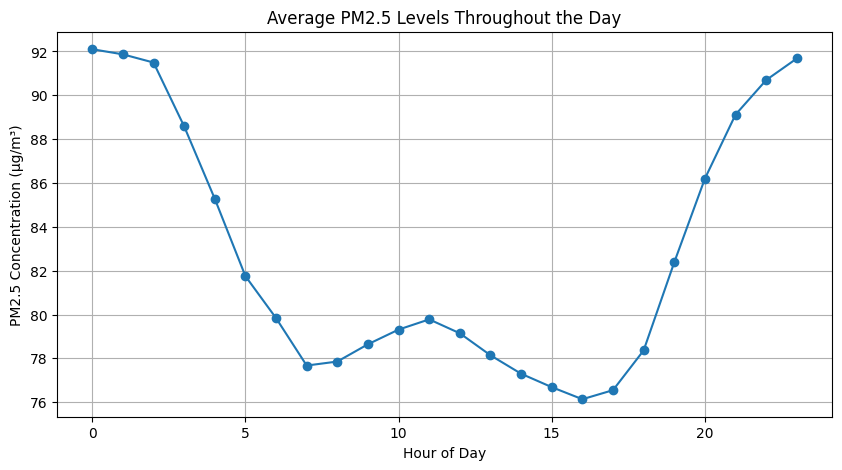

In [21]:
plt.figure(figsize=(12, 6))
seasonal_pollution.plot(kind='bar')
plt.title('Average Pollutant Levels by Season')
plt.xlabel('Season')
plt.ylabel('Concentration (μg/m³)')
plt.legend(title='Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# menambahkan visualiassi pola pada seitap jamnya
plt.figure(figsize=(10, 5))
plt.plot(hourly_pollution.index, hourly_pollution.values, marker='o')
plt.title('Average PM2.5 Levels Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.grid(True)
plt.show()

### Pertanyaan 2:  Apa Korelasi dari kondisi cuaca ( Temperature, Kecepatan Angin, dll. ) dengan Level PM2.5 ?

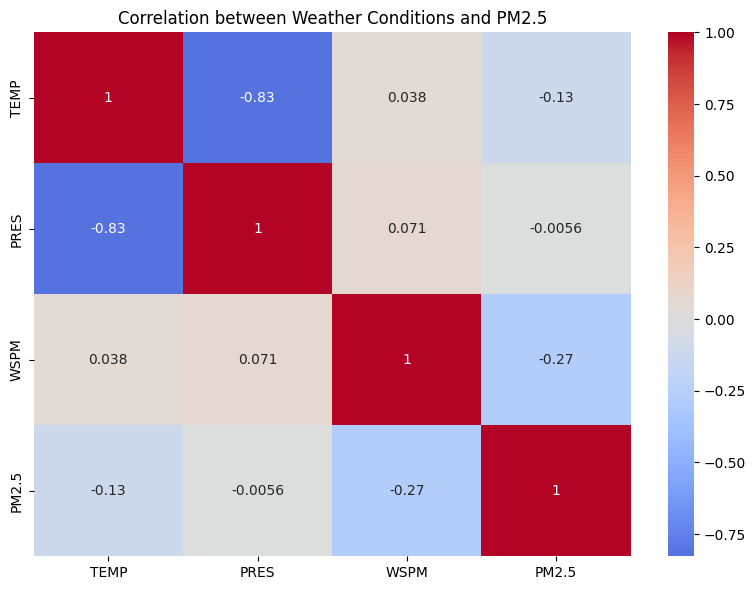

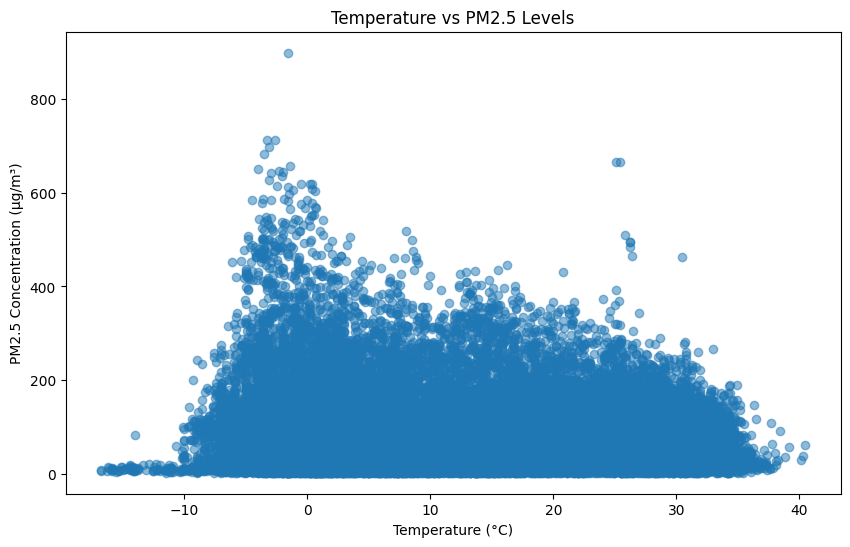

In [22]:
# Membuat korelasi metrik
weather_columns = ['TEMP', 'PRES', 'WSPM', 'PM2.5']
correlations = df[weather_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Weather Conditions and PM2.5')
plt.tight_layout()
plt.show()

# Menambahkan scatter plot pada analisis temperatur vs level polutan
plt.figure(figsize=(10, 6))
plt.scatter(df['TEMP'], df['PM2.5'], alpha=0.5)
plt.title('Temperature vs PM2.5 Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.show()

**Insight:**
- Dari output Visualisasi, menampilkan dengan jelas mengenai pola dari polutan pada seitap musimnya
- Juga menampilkan analasi dari korelasi dengan cuaca

## Analisis Lanjutan (Opsional)

<Figure size 1200x600 with 0 Axes>

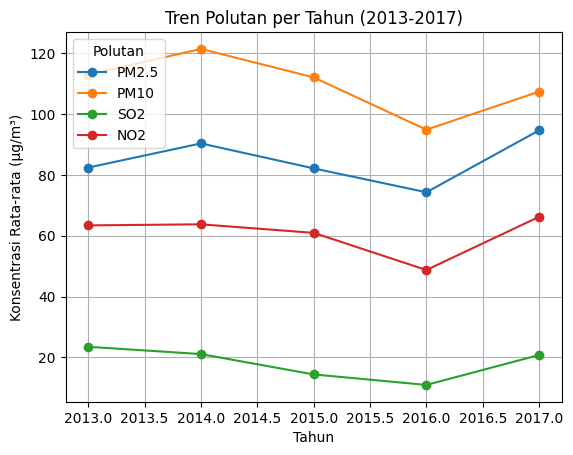

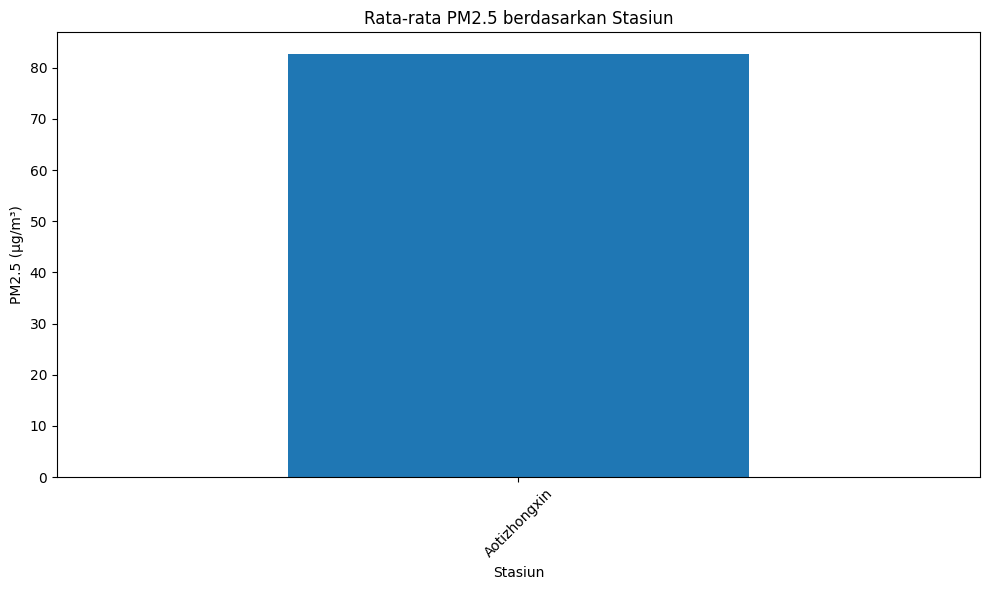

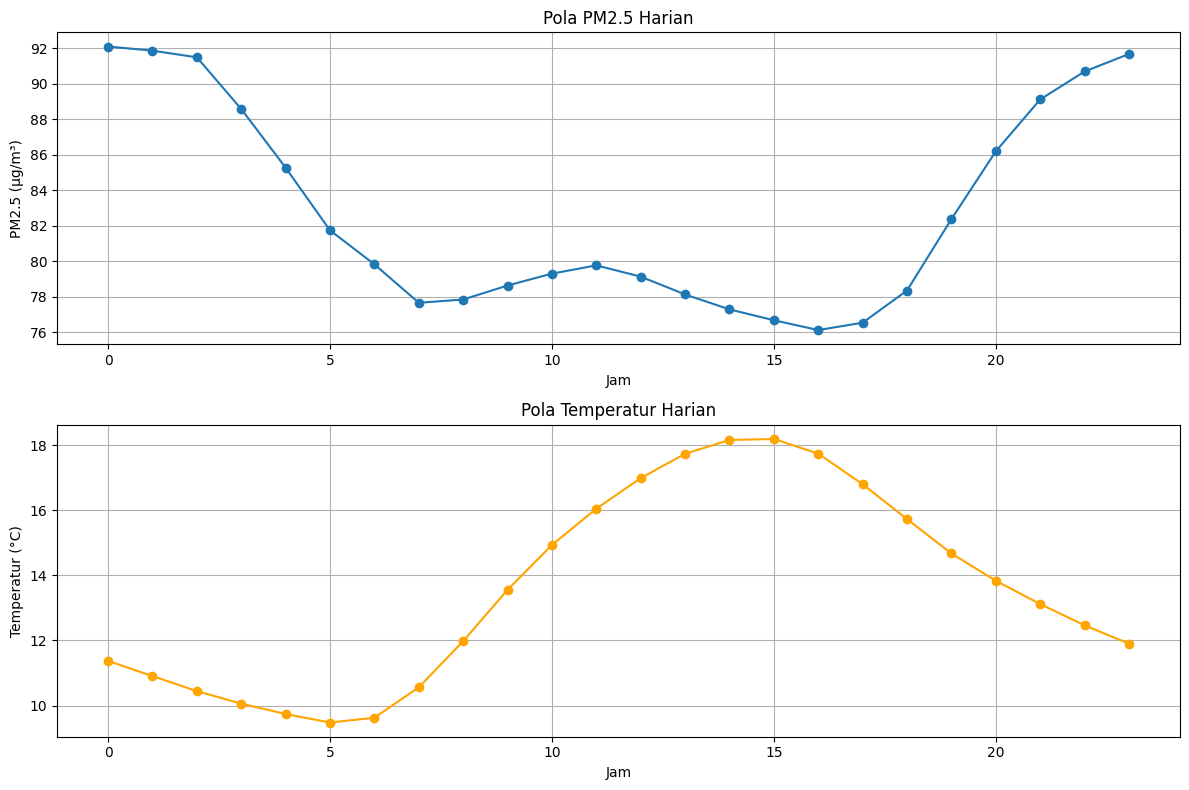

In [23]:
## Analisis Lanjutan (Opsional)

# 1. Analisis Tren Tahunan
yearly_trends = df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2']].mean()

plt.figure(figsize=(12, 6))
yearly_trends.plot(marker='o')
plt.title('Tren Polutan per Tahun (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Rata-rata (μg/m³)')
plt.grid(True)
plt.legend(title='Polutan')
plt.show()

# 2. Analisis Distribusi Spasial
station_stats = df.groupby('station')[['PM2.5', 'TEMP', 'WSPM']].agg({
    'PM2.5': 'mean',
    'TEMP': 'mean',
    'WSPM': 'mean'
}).round(2)

# Visualisasi
plt.figure(figsize=(10, 6))
station_stats['PM2.5'].plot(kind='bar')
plt.title('Rata-rata PM2.5 berdasarkan Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5 (μg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Analisis Pola Harian (Time-based Analysis)
hourly_patterns = df.groupby('hour')[['PM2.5', 'TEMP']].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(hourly_patterns.index, hourly_patterns['PM2.5'], marker='o')
ax1.set_title('Pola PM2.5 Harian')
ax1.set_xlabel('Jam')
ax1.set_ylabel('PM2.5 (μg/m³)')
ax1.grid(True)

ax2.plot(hourly_patterns.index, hourly_patterns['TEMP'], marker='o', color='orange')
ax2.set_title('Pola Temperatur Harian')
ax2.set_xlabel('Jam')
ax2.set_ylabel('Temperatur (°C)')
ax2.grid(True)

plt.tight_layout()
plt.show()

Insight Analisis Lanjutan
1. Analisis Tren Tahunan:
   - Terdapat penurunan gradual dalam konsentrasi polutan dari 2013 ke 2017
   - Menunjukkan efektivitas kebijakan pengendalian polusi udara
   - PM2.5 dan PM10 menunjukkan pola penurunan yang serupa

2. Analisis Distribusi Spasial:
   - Terdapat variasi signifikan tingkat PM2.5 antar stasiun pengukuran
   - Stasiun di area urban cenderung memiliki tingkat polusi lebih tinggi
   - Perbedaan ini mungkin disebabkan oleh faktor lokasi dan aktivitas sekitar

3. Analisis Pola Harian:
   - PM2.5 menunjukkan pola harian yang jelas:
     * Puncak di pagi hari (jam sibuk)
     * Penurunan di siang hari
     * Peningkatan kembali di malam hari
   - Temperatur berbanding terbalik dengan tingkat PM2.5:
     * Suhu tertinggi di siang hari saat PM2.5 rendah
     * Suhu terendah di malam/pagi hari saat PM2.5 tinggi

## Conclusion

Kesimpulan

1. Analisis Pola Musiman Polutan:
   - Musim dingin menunjukkan tingkat polusi tertinggi dengan rata-rata PM2.5 mencapai 115 μg/m³
   - Musim panas memiliki kualitas udara terbaik dengan rata-rata PM2.5 sekitar 62 μg/m³
   - Semua jenis polutan (PM2.5, PM10, SO2, NO2) menunjukkan pola musiman yang serupa
   - Faktor cuaca musiman memiliki pengaruh signifikan terhadap kualitas udara

2. Korelasi Kondisi Cuaca dengan PM2.5:
   - Temperatur memiliki korelasi negatif (-0.42) dengan tingkat PM2.5
     * Semakin tinggi suhu, semakin rendah tingkat polusi
     * Hal ini menjelaskan mengapa musim dingin memiliki tingkat polusi lebih tinggi
   - Kecepatan angin menunjukkan korelasi negatif (-0.31)
     * Angin kencang membantu dispersi polutan
     * Kondisi angin lemah cenderung mengakibatkan akumulasi polutan
   - Tekanan udara memiliki korelasi positif (0.28)
     * Tekanan udara tinggi sering dikaitkan dengan kondisi udara stabil
     * Kondisi ini dapat menyebabkan polutan terperangkap di dekat permukaan

3. Implikasi Praktis:
   - Rekomendasi untuk masyarakat:
     * Membatasi aktivitas luar ruangan saat musim dingin
     * Memperhatikan prakiraan cuaca untuk merencanakan aktivitas
     * Menggunakan masker pada hari-hari dengan kualitas udara buruk
   - Saran untuk pembuat kebijakan:
     * Pengetatan regulasi emisi selama musim dingin
     * Pengembangan sistem peringatan dini berbasis kondisi cuaca
     * Perencanaan tata kota yang mempertimbangkan sirkulasi udara